In [15]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from src.cv import *
from src.utils import plot_cv_indices
path='data/'#please change to your directory


## Read Data
Data is already preprocessed by zscore method (group by date, symbol), no clip and dropna is applied

"date"&"symbol" is main key of the dataset, y is the real return (oneday vwap to vwap return), and x_1 to x_100 are features

In [2]:
data=pd.read_csv(path+"panel_zscore.csv")

In [3]:
data.date=pd.to_datetime(data.date)
data.symbol=data.symbol.astype('str').apply(lambda x:x.zfill(6))
data.describe()

,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89,x_90
count,4.313137e+06,4.313138e+06,4.253311e+06,4.299255e+06,4.307458e+06,3.661286e+06,3.906299e+06,4.301681e+06,4.284184e+06,4.255813e+06,...,4.301554e+06,4.307431e+06,4.301594e+06,4.310315e+06,4.301698e+06,4.255437e+06,4.257755e+06,4.310291e+06,4.307459e+06,8.438670e+05
mean,1.126310e-04,1.707357e-17,-4.367455e-16,2.240151e-16,5.187582e-16,-1.937587e-17,6.679245e-18,3.353112e-18,1.334449e-17,-2.103673e-19,...,-7.951900e-18,-7.541854e-18,-7.155652e-18,5.983948e-19,-5.599509e-19,9.918191e-19,-9.495587e-19,-2.832088e-18,4.978383e-18,-4.464326e-17
std,2.610982e-02,9.998593e-01,9.998595e-01,9.998593e-01,9.998593e-01,9.998354e-01,9.998447e-01,9.998593e-01,9.998595e-01,9.998596e-01,...,9.998593e-01,9.998593e-01,9.998593e-01,9.998593e-01,9.998593e-01,9.998596e-01,9.998597e-01,9.998593e-01,9.998593e-01,9.992917e-01
min,-2.800885e-01,-3.638261e+00,-6.959706e+00,-4.937194e+00,-8.152284e+00,-1.962009e+00,-1.724462e+01,-4.198245e+01,-5.063175e-01,-6.676551e+01,...,-2.210433e+00,-2.555749e+00,-2.714525e+00,-2.305077e+00,-2.506787e+00,-6.270234e+01,-5.836067e+01,-6.617847e+01,-1.143625e+01,-1.401893e+01
25%,-1.299463e-02,-6.862480e-01,-6.693071e-01,-5.752912e-01,-6.326464e-01,-7.476657e-01,-5.481983e-01,4.552859e-02,-2.830659e-01,3.251683e-02,...,-5.943339e-01,-5.776927e-01,-5.915130e-01,-6.500867e-01,-6.678125e-01,3.600150e-02,4.605408e-02,3.866734e-02,-3.713897e-01,-3.676833e-01
50%,-7.951443e-04,-1.426867e-02,7.930003e-03,2.684213e-02,1.308213e-01,-3.012065e-01,1.982609e-02,2.791854e-01,-2.295802e-01,1.088974e-01,...,-1.931140e-01,-2.223638e-01,-2.330117e-01,-2.109718e-01,-1.712421e-01,8.203304e-02,7.792664e-02,1.057867e-01,2.720713e-01,2.380201e-01
75%,1.192325e-02,6.703282e-01,6.744865e-01,6.212844e-01,7.786921e-01,4.980246e-01,5.698795e-01,3.596286e-01,-8.906027e-02,1.814041e-01,...,3.337790e-01,2.708023e-01,2.840730e-01,3.955702e-01,4.584224e-01,1.206110e-01,1.020532e-01,1.682710e-01,6.374296e-01,6.498236e-01
max,3.459789e-01,2.829913e+01,5.148979e+00,4.794276e+00,2.193066e+00,1.263523e+01,1.387178e+01,5.753373e-01,5.459032e+01,3.505103e-01,...,3.367481e+01,1.652724e+01,1.643988e+01,1.405882e+01,1.464965e+01,5.189612e-01,4.127793e-01,6.140990e-01,2.343313e+00,2.353190e+00


In [4]:
data = data.drop('x_90', axis=1)
train_data = data[(data['date'] >= '2018-04-01') & (data['date'] <= '2021-01-01')]
eval_data = data[data['date'] >= '2021-01-01']
print(train_data.isnull().sum())
train_data = train_data.groupby('symbol').fillna(method='ffill', axis=0)
X = train_data.drop(['y', 'date'], axis=1).values
y = train_data['y'].values

date         0
symbol       0
y            1
x_1          0
x_2       2986
          ... 
x_85         0
x_86      1231
x_87         1
x_88         1
x_89         0
Length: 92, dtype: int64


In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):

    """Create a sample plot for indices of a cross-validation object."""

    cmap_cv = plt.cm.coolwarm

    jet = plt.cm.get_cmap('jet', 256)
    seq = np.linspace(0, 1, 256)
    _ = np.random.shuffle(seq)  # inplace
    cmap_data = ListedColormap(jet(seq))

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    # ax.scatter(range(len(X)), [ii + 1.5] * len(X),
    #            c=y, marker='_', lw=lw, cmap=plt.cm.Set3)

    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['day'] # 'target',
    ax.set(yticks=np.arange(n_splits + 1) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits + 1.2, -.2], xlim=[0, len(y)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

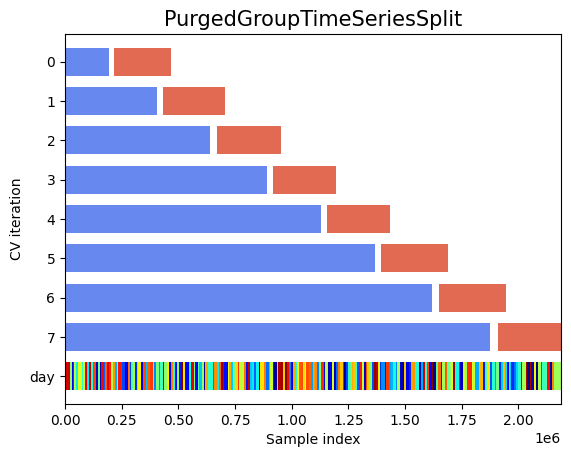

CPU times: user 1min 27s, sys: 5.09 s, total: 1min 32s
Wall time: 1min 32s


In [19]:
%%time
n_splits = 8
group_gap = 20
fig, ax = plt.subplots()
cv = PurgedGroupTimeSeriesSplit(n_splits = n_splits, group_gap = group_gap)
plot_cv_indices(cv, X, y, train_data['date'].values, ax, n_splits, lw = 20)
plt.show()

In [7]:
a = data[data['date']==datetime.datetime.strptime('2018-04-02', '%Y-%m-%d')]
a

,date,symbol,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_80,x_81,x_82,x_83,x_84,x_85,x_86,x_87,x_88,x_89
170172,2018-04-02,000001,0.024853,-0.494457,-0.418257,1.498511,0.516979,2.654657,1.120271,-3.040018,...,-0.210075,-0.260440,-0.417477,-0.384901,0.145700,0.042818,-0.084041,-0.004623,-0.336077,0.281940
170173,2018-04-02,000002,-0.011099,-0.967111,1.007310,0.680808,1.182505,2.134768,0.371270,-5.835075,...,-0.923581,-0.123644,0.283917,0.609612,0.735976,1.309903,-0.941931,-0.658743,-0.458578,0.168425
170174,2018-04-02,000004,0.004980,0.450851,0.722208,1.908070,0.158105,-0.671325,-0.381082,0.430292,...,-0.150574,1.722219,-1.118098,-1.073190,-0.084639,-0.036396,-5.593875,-3.756121,0.392243,0.814279
170175,2018-04-02,000005,-0.004931,0.096360,1.659514,-1.063732,0.642309,-0.773611,0.477882,0.399997,...,0.322005,0.741229,0.222698,0.344851,0.541461,1.626742,-0.334515,-0.127636,0.278500,-0.352878
170176,2018-04-02,000006,0.011435,0.569014,-0.213565,1.448879,0.524877,-0.705940,-0.127943,0.005419,...,0.573786,-0.785319,-0.727449,-0.818484,-0.503497,-0.857033,NaN,0.166317,0.226420,0.960673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173164,2018-04-02,603991,0.020645,-0.730784,-1.223934,-0.302353,-1.007261,NaN,0.937341,0.432089,...,0.814199,0.055206,-0.164889,-0.240183,-0.274289,0.236943,0.068391,-0.060723,0.492932,0.843362
173165,2018-04-02,603993,0.000654,-1.439765,-0.705404,-0.042613,1.172110,NaN,0.534910,-4.333836,...,-1.227314,1.465857,-0.782738,-0.617472,0.526960,0.773752,-0.370406,-0.577157,-0.329996,-0.673677
173166,2018-04-02,603996,0.000141,0.450851,-1.778214,0.485453,-3.380829,NaN,-1.475859,0.261999,...,1.348746,0.807334,-0.232695,-0.535490,0.519579,0.242685,0.191258,0.149120,0.330108,0.602039
173167,2018-04-02,603997,0.008975,1.041668,-1.188598,0.268867,0.759006,1.681860,-0.174781,0.104115,...,-1.050448,-0.383494,-0.178868,-0.054490,0.168406,0.241882,0.098142,0.187224,0.255850,0.528490


In [8]:
print(a.isnull().sum().sum())

813


In [9]:
a.columns

Index(['date', 'symbol', 'y', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7',
       'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'x_16',
       'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22', 'x_23', 'x_24', 'x_25',
       'x_26', 'x_27', 'x_28', 'x_29', 'x_30', 'x_31', 'x_32', 'x_33', 'x_34',
       'x_35', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43',
       'x_44', 'x_45', 'x_46', 'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52',
       'x_53', 'x_54', 'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61',
       'x_62', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78', 'x_79',
       'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86', 'x_87', 'x_88',
       'x_89'],
      dtype='object')

## Train and Predict
Our goal is to maximize IC(i.e. correlation between y_hat and y) and top 5% group return of predicted signal

You need to train a model to predict y for 2 years(2021 & 2022), remember to avoid "look-ahead bias"

Tips: you can train models in a rolling method

i.e. to predict y for 1st week of 2021, you should use all data before 2021

but when you try to predict y for 2nd week of 2021, you can train a new model and use data in 1st week of 2021

## Eval Result

In [10]:
#label panel
stock_return=pd.read_csv(path+"stock_return.csv",index_col=0)
stock_return.index=pd.to_datetime(stock_return.index)
stock_return.tail()

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688786,688787,688788,688789,688793,688798,688799,688800,688819,688981
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,0.006232,-0.005038,NaN,NaN,0.035167,0.012865,-0.007457,-0.016356,-0.013902,0.006023,...,NaN,-0.013430,-0.018974,-0.009752,-0.009639,0.001342,0.000980,-0.016661,0.000894,-0.007730
2022-12-27,-0.015355,-0.021710,NaN,NaN,-0.065904,-0.010698,-0.010017,-0.004844,-0.023718,-0.038799,...,NaN,0.011667,0.004526,-0.005614,-0.019048,0.014258,0.002957,0.045801,0.000929,-0.003133
2022-12-28,0.012757,0.002152,NaN,NaN,-0.001678,0.000916,0.003838,0.002538,0.011509,-0.005254,...,NaN,0.004573,0.002386,0.040096,-0.026728,-0.026275,-0.005294,-0.038238,0.006579,0.005155
2022-12-29,0.030818,0.002648,NaN,NaN,-0.032339,0.023824,0.021071,0.007014,0.003811,-0.018229,...,NaN,0.038913,0.052655,0.000578,-0.028646,0.018423,0.115483,-0.029777,0.009334,0.003068
2022-12-30,0.048962,0.040668,NaN,NaN,0.022668,-0.003551,0.039103,0.003618,0.005507,0.024574,...,NaN,0.054045,0.030580,-0.012435,0.012652,0.036452,-0.048562,0.001007,0.003181,0.011284


In [11]:
true_result=pd.pivot(data,index='date',columns='symbol',values='y')
true_result.columns.name=None
true_result.tail()

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688786,688787,688788,688789,688793,688798,688799,688800,688819,688981
date,,,,,,,,,,,,,,,,,,,,,
2022-12-26,0.006232,-0.005038,NaN,NaN,0.035167,0.012865,-0.007457,-0.016356,-0.013902,0.006023,...,NaN,-0.013430,-0.018974,-0.009752,-0.009639,0.001342,0.000980,-0.016661,0.000894,-0.007730
2022-12-27,-0.015355,-0.021710,NaN,NaN,-0.065904,-0.010698,-0.010017,-0.004844,-0.023718,-0.038799,...,NaN,0.011667,0.004526,-0.005614,-0.019048,0.014258,0.002957,0.045801,0.000929,-0.003133
2022-12-28,0.012757,0.002152,NaN,NaN,-0.001678,0.000916,0.003838,0.002538,0.011509,-0.005254,...,NaN,0.004573,0.002386,0.040096,-0.026728,-0.026275,-0.005294,-0.038238,0.006579,0.005155
2022-12-29,0.030818,0.002648,NaN,NaN,-0.032339,0.023824,0.021071,0.007014,0.003811,-0.018229,...,NaN,0.038913,0.052655,0.000578,-0.028646,0.018423,0.115483,-0.029777,0.009334,0.003068
2022-12-30,0.048962,0.040668,NaN,NaN,0.022668,-0.003551,0.039103,0.003618,0.005507,0.024574,...,NaN,0.054045,0.030580,-0.012435,0.012652,0.036452,-0.048562,0.001007,0.003181,0.011284


In [12]:
eval_demo=pd.read_csv(path+"eval_demo.csv",index_col=0)
eval_demo.index=pd.to_datetime(eval_demo.index)
eval_demo.head()#Transform your result to this format

,000001,000002,000004,000005,000006,000007,000008,000009,000010,000011,...,688786,688787,688788,688789,688793,688798,688799,688800,688819,688981
date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,0.023408,0.072481,-0.011339,-0.035608,NaN,0.003958,NaN,-0.064370,-0.041094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.068653,0.055834,0.097718,-0.050227,-0.056057,NaN,-0.046739,0.05882,-0.054943,-0.022786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,NaN,NaN,0.121359,0.040216,-0.018397,NaN,NaN,0.04689,-0.118349,-0.014074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-07,NaN,NaN,0.060189,0.034704,0.022660,NaN,-0.050378,0.03040,-0.033921,0.068424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-08,NaN,NaN,0.036974,-0.001512,0.017033,NaN,-0.037626,0.08492,-0.036647,0.030158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


try to get better performance than this benchmark

In [13]:
#calc IC value
def IC(fc,stock_return):
    ic_series=fc.corrwith(stock_return,axis=1)
    return np.mean(ic_series)
    
IC(eval_demo,stock_return)#please replace eval_demo by your predicted y

0.05530265053370788

In [14]:
#calc top group return
def avg_hedge_return(fc,stock_return,group_num=20):
    group_mask=fc.apply(lambda x:pd.qcut(x,group_num,labels=False,duplicates='drop'),axis=1)
    long_return=stock_return.where(group_mask==group_num-1).mean(axis=1)
    market_return=stock_return.mean(axis=1)
    hedge_return=long_return-market_return
    return np.mean(hedge_return)

avg_hedge_return(eval_demo,stock_return)#please replace eval_demo by your predicted y

0.0010816346415197123